In [4]:
import pandas as pd
import dill
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import networkx as nx

from sklearn.preprocessing import MinMaxScaler

In [5]:
RESULTS_DIR = '/Users/hailey/repos/convex_wi23/results/'
assert os.path.exists(RESULTS_DIR)

In [6]:
FIG_DIR = '/Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/'
assert os.path.exists(FIG_DIR)

In [7]:
basic_results_file = 'results_basic.pkl'
generated_results_file = 'results_gen_3_19.pkl'
with open(os.path.join(RESULTS_DIR, basic_results_file), 'rb') as infile:
    results_basic = dill.load(infile)
with open(os.path.join(RESULTS_DIR, generated_results_file), 'rb') as infile:
    results_gen = dill.load(infile)


In [8]:
df_basic = pd.DataFrame(data=results_basic)
df_generated = pd.DataFrame(data=results_gen)
df_basic[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_basic.b.tolist(), index= df_basic.index)
df_basic[['x1', 'x2', 'x3']] = pd.DataFrame(df_basic.x.tolist(), index= df_basic.index)
df_generated[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_generated.b.tolist(), index= df_generated.index)
df_generated[['x1', 'x2', 'x3']] = pd.DataFrame(df_generated.x.tolist(), index= df_generated.index)

In [9]:
df_basic

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
0,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 6318.0, 11685.0]",flutter-mane,flutter-mane,162.0,107.0,187.0,6318.0,11685.0,130.0,75.0,155.0
1,False,355.0,"[131.0, 134.0, 90.0]","[163.0, 166.0, 112.0, 6318.0, 11685.0]",flutter-mane,iron-bundle,163.0,166.0,112.0,6318.0,11685.0,131.0,134.0,90.0
2,False,445.0,"[229.0, 128.0, 88.0]","[261.0, 160.0, 120.0, 6318.0, 11685.0]",flutter-mane,iron-hands,261.0,160.0,120.0,6318.0,11685.0,229.0,128.0,88.0
3,False,414.0,"[190.0, 151.0, 73.0]","[222.0, 183.0, 105.0, 6318.0, 11685.0]",flutter-mane,great-tusk,222.0,183.0,105.0,6318.0,11685.0,190.0,151.0,73.0
4,False,388.0,"[162.0, 115.0, 111.0]","[194.0, 147.0, 143.0, 6318.0, 11685.0]",flutter-mane,gholdengo,194.0,147.0,143.0,6318.0,11685.0,162.0,115.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,False,445.0,"[225.0, 135.0, 85.0]","[257.0, 167.0, 117.0, 11685.0, 10332.0]",kingambit,dondozo,257.0,167.0,117.0,11685.0,10332.0,225.0,135.0,85.0
140,False,340.0,"[143.0, 82.0, 115.0]","[175.0, 112.0, 147.0, 11685.0, 10332.0]",kingambit,tatsugiri,175.0,112.0,147.0,11685.0,10332.0,143.0,82.0,115.0
141,False,401.0,"[166.0, 115.0, 120.0]","[198.0, 147.0, 152.0, 11685.0, 10332.0]",kingambit,dragonite,198.0,147.0,152.0,11685.0,10332.0,166.0,115.0,120.0
142,False,392.0,"[180.0, 91.0, 121.0]","[212.0, 123.0, 153.0, 11685.0, 10332.0]",kingambit,roaring-moon,212.0,123.0,153.0,11685.0,10332.0,180.0,91.0,121.0


In [10]:
df_generated

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
0,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12000]",generated,flutter-mane,162,107,187,8000,12000,130.0,75.0,155.0
1,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12100]",generated,flutter-mane,162,107,187,8000,12100,130.0,75.0,155.0
2,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12200]",generated,flutter-mane,162,107,187,8000,12200,130.0,75.0,155.0
3,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12300]",generated,flutter-mane,162,107,187,8000,12300,130.0,75.0,155.0
4,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12400]",generated,flutter-mane,162,107,187,8000,12400,130.0,75.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21500]",generated,flutter-mane,162,107,187,15900,21500,149.0,107.0,155.0
7996,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21600]",generated,flutter-mane,162,107,187,15900,21600,149.0,107.0,155.0
7997,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21700]",generated,flutter-mane,162,107,187,15900,21700,149.0,107.0,155.0
7998,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21800]",generated,flutter-mane,162,107,187,15900,21800,149.0,107.0,155.0


In [11]:
df_basic[df_basic["attacker"] == 'tatsugiri']

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
96,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 8064.0, 14742.0]",tatsugiri,flutter-mane,162.0,107.0,187.0,8064.0,14742.0,130.0,75.0,155.0
97,False,378.0,"[132.0, 134.0, 112.0]","[163.0, 166.0, 112.0, 8064.0, 14742.0]",tatsugiri,iron-bundle,163.0,166.0,112.0,8064.0,14742.0,132.0,134.0,112.0
98,False,445.0,"[229.0, 128.0, 88.0]","[261.0, 160.0, 120.0, 8064.0, 14742.0]",tatsugiri,iron-hands,261.0,160.0,120.0,8064.0,14742.0,229.0,128.0,88.0
99,False,419.0,"[190.0, 151.0, 78.0]","[222.0, 183.0, 105.0, 8064.0, 14742.0]",tatsugiri,great-tusk,222.0,183.0,105.0,8064.0,14742.0,190.0,151.0,78.0
100,False,388.0,"[162.0, 115.0, 111.0]","[194.0, 147.0, 143.0, 8064.0, 14742.0]",tatsugiri,gholdengo,194.0,147.0,143.0,8064.0,14742.0,162.0,115.0,111.0
101,False,379.0,"[189.0, 90.0, 100.0]","[221.0, 122.0, 132.0, 8064.0, 14742.0]",tatsugiri,amoonguss,221.0,122.0,132.0,8064.0,14742.0,189.0,90.0,100.0
102,False,365.0,"[165.0, 100.0, 100.0]","[197.0, 132.0, 132.0, 8064.0, 14742.0]",tatsugiri,arcanine,197.0,132.0,132.0,8064.0,14742.0,165.0,100.0,100.0
103,False,445.0,"[225.0, 135.0, 85.0]","[257.0, 167.0, 117.0, 8064.0, 14742.0]",tatsugiri,dondozo,257.0,167.0,117.0,8064.0,14742.0,225.0,135.0,85.0
104,False,338.0,"[143.0, 80.0, 115.0]","[175.0, 112.0, 147.0, 8064.0, 14742.0]",tatsugiri,tatsugiri,175.0,112.0,147.0,8064.0,14742.0,143.0,80.0,115.0
105,False,401.0,"[166.0, 115.0, 120.0]","[198.0, 147.0, 152.0, 8064.0, 14742.0]",tatsugiri,dragonite,198.0,147.0,152.0,8064.0,14742.0,166.0,115.0,120.0


In [12]:
def bar_plot_by_attacker(attacker, df, save_path=''):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    b1_df = df[df["attacker"] == attacker][["defender", "objective_val"]]
    b1_df["objective_val_lb"] = df.apply(lambda row: row["objective_val"] + (sum(row["x"]) - (row["b1"] + row["b2"] + row["b3"] - 96)), axis = 1)
    b1_df = b1_df.sort_values(by=["objective_val"])

    sb.barplot(data=b1_df, x="defender", y="objective_val_lb", ax=ax, color="darksalmon")
    sb.barplot(data=b1_df, x="defender", y="objective_val", ax=ax, color="darkturquoise")

    ax.set(xlabel='defender', ylabel='Objective Value')
    ax.set_title(f"Attacker: {attacker}")

    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=60)
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'objective_bar_plot_{attacker}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')
    plt.show()


fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/objective_bar_plot_tatsugiri.png


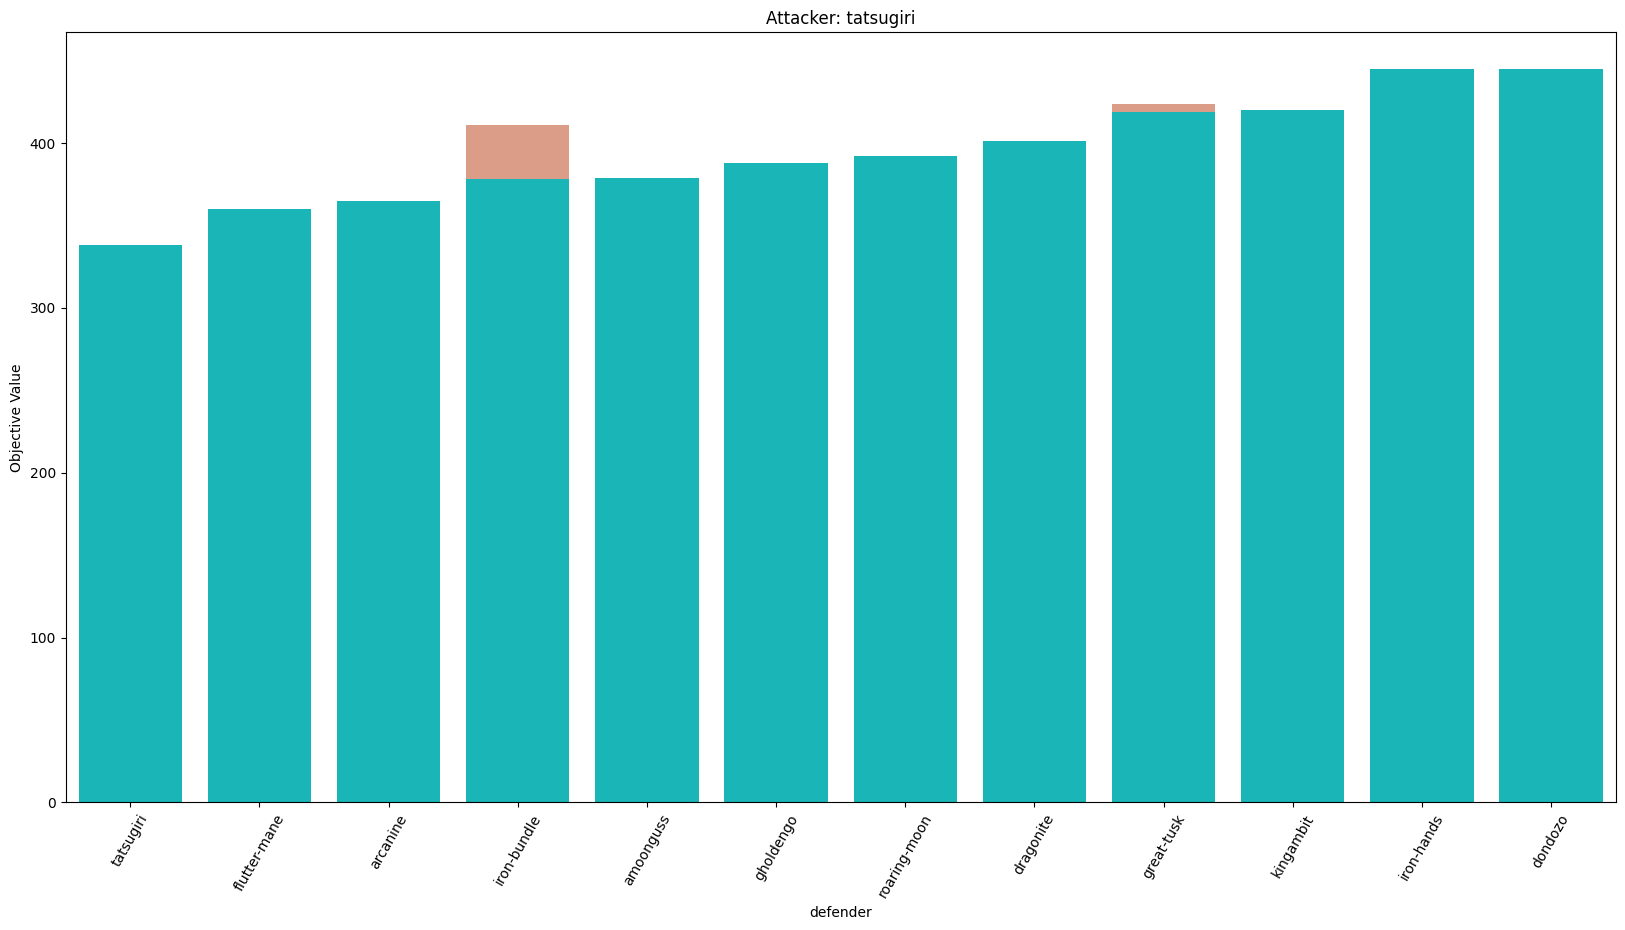

In [13]:
bar_plot_by_attacker('tatsugiri', df_basic, save_path='')

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3,objective
0,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 6318.0, 11685.0]",flutter-mane,flutter-mane,162.0,107.0,187.0,6318.0,11685.0,130.0,75.0,155.0,360.0
1,False,355.0,"[131.0, 134.0, 90.0]","[163.0, 166.0, 112.0, 6318.0, 11685.0]",flutter-mane,iron-bundle,163.0,166.0,112.0,6318.0,11685.0,131.0,134.0,90.0,355.0
2,False,445.0,"[229.0, 128.0, 88.0]","[261.0, 160.0, 120.0, 6318.0, 11685.0]",flutter-mane,iron-hands,261.0,160.0,120.0,6318.0,11685.0,229.0,128.0,88.0,445.0
3,False,414.0,"[190.0, 151.0, 73.0]","[222.0, 183.0, 105.0, 6318.0, 11685.0]",flutter-mane,great-tusk,222.0,183.0,105.0,6318.0,11685.0,190.0,151.0,73.0,414.0
4,False,388.0,"[162.0, 115.0, 111.0]","[194.0, 147.0, 143.0, 6318.0, 11685.0]",flutter-mane,gholdengo,194.0,147.0,143.0,6318.0,11685.0,162.0,115.0,111.0,388.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,False,445.0,"[225.0, 135.0, 85.0]","[257.0, 167.0, 117.0, 11685.0, 10332.0]",kingambit,dondozo,257.0,167.0,117.0,11685.0,10332.0,225.0,135.0,85.0,445.0
140,False,340.0,"[143.0, 82.0, 115.0]","[175.0, 112.0, 147.0, 11685.0, 10332.0]",kingambit,tatsugiri,175.0,112.0,147.0,11685.0,10332.0,143.0,82.0,115.0,340.0
141,False,401.0,"[166.0, 115.0, 120.0]","[198.0, 147.0, 152.0, 11685.0, 10332.0]",kingambit,dragonite,198.0,147.0,152.0,11685.0,10332.0,166.0,115.0,120.0,401.0
142,False,392.0,"[180.0, 91.0, 121.0]","[212.0, 123.0, 153.0, 11685.0, 10332.0]",kingambit,roaring-moon,212.0,123.0,153.0,11685.0,10332.0,180.0,91.0,121.0,392.0


In [115]:
import matplotlib.ticker as ticker


In [153]:
b4_ticks = [5000, 7000, 9000, 11000, 13000, 15000, 17000, 100000]

np.linspace(min(b4_ticks), max(b4_ticks), len(b4_ticks))

array([  5000.        ,  18571.42857143,  32142.85714286,  45714.28571429,
        59285.71428571,  72857.14285714,  86428.57142857, 100000.        ])

In [223]:
def scatter_plot_by_defender(defender, df, df_gen, attacker_subset, save_path=''):
    colors = ['skyblue', 'pink', 'sienna', 'darkblue', 'burlywood', 'grey', 'black','red', 'lime', 'orange', 'plum', 'aqua', ]
    fig, axes = plt.subplots(1,3, figsize=(20, 10))
    df = df[df['attacker'].isin(attacker_subset)& (df['defender'] == defender)].assign(objective=df.objective_val)
    df_gen = df_gen.assign(objective=df_gen.objective_val)

    # add example attackers to subplots
    sns.pointplot(data=df, hue='attacker', x='b4', y='b5', ax=axes[0])
    sns.pointplot(data=df, hue='attacker', x='b4', y='objective_val', ax=axes[1])
    sns.pointplot(data=df, hue='attacker', x='b5', y='objective_val', ax=axes[2])
    
    errorbar_fun = lambda x: (x.min(), x.max())
    sns.pointplot(data=df_gen[df_gen['b4']<15000], x='b4', y='objective', errorbar=errorbar_fun, ax=axes[1])
    sns.pointplot(data=df_gen, x='b5', y='objective', errorbar=errorbar_fun, ax=axes[2])
    for ind, label in enumerate(axes[1].get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    for ind, label in enumerate(axes[2].get_xticklabels()):
        if ind % 10 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

#     subset data to get upper and lower objective values
#     df_gen = df_gen.sort_values(by=['objective'], ascending=True)
#     df_gen_b4_lower = df_gen.drop_duplicates(subset=['b4'], keep='first', inplace=False)
#     df_gen_b4_upper = df_gen.drop_duplicates(subset=['b4'], keep='last', inplace=False)
#     df_gen_b5_lower = df_gen.drop_duplicates(subset=['b5'], keep='first', inplace=False)
#     df_gen_b5_upper = df_gen.drop_duplicates(subset=['b5'], keep='last', inplace=False)

    # plot ranges for objective values
#     sns.scatterplot(data=df_gen_b4_lower, x='b4', y='objective', ax=axes[1], color='blue')
#     sns.scatterplot(data=df_gen_b4_upper, x='b4', y='objective', ax=axes[1], color='blue')
#     sns.scatterplot(data=df_gen_b5_lower, x='b5', y='objective', ax=axes[2], color='blue')
#     sns.scatterplot(data=df_gen_b5_upper, x='b5', y='objective', ax=axes[2], color='blue')
#     axes[0].set_xticks([5000, 7000, 9000, 11000, 13000, 15000], labels=[5000, 7000, 9000, 11000, 13000, 15000])
#     axes[0].set_yticks([9000, 11000, 13000, 15000, 17000, 19000, 21000], labels=[9000, 11000, 13000, 15000, 17000, 19000, 21000])
#     axes[0].margins(x=0)

    # add figure level legend and remove legends from subplots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', markerscale=2)
    [ax.legend().remove() for ax in axes]
    [ax.tick_params(axis='x', labelrotation = 45) for ax in axes]


    plt.xticks(rotation = 45)
    fig.suptitle(f'Defender: {defender}')
    plt.rcParams.update({'font.size': 15})
    fig.tight_layout()
    
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'scatter_plot_defender_{defender}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')
        
    plt.show()

In [224]:
df_generated['b4'].describe()

count     8000.000000
mean     11950.000000
std       2309.364988
min       8000.000000
25%       9975.000000
50%      11950.000000
75%      13925.000000
max      15900.000000
Name: b4, dtype: float64

fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/scatter_plot_defender_flutter-mane.png


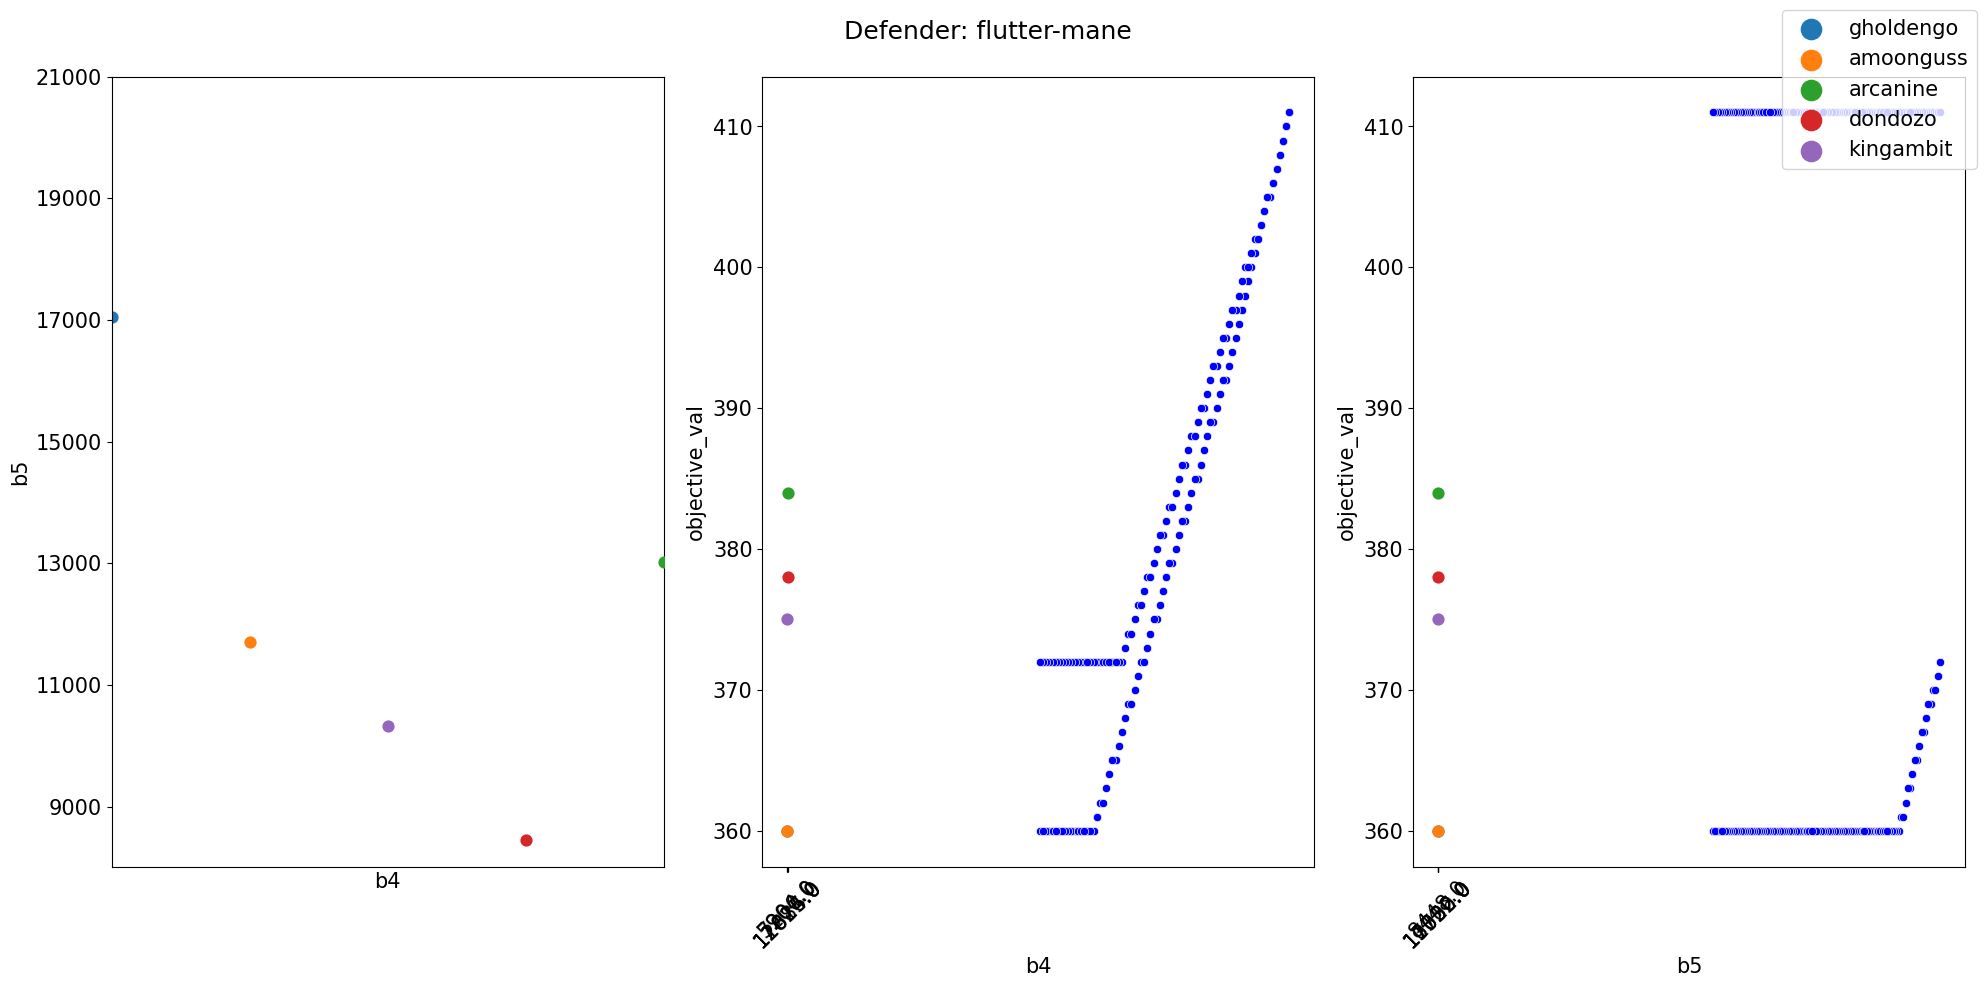

In [225]:
attacker_subset = ['gholdengo', 'arcanine', 'dondozo', 'amoonguss', 'kingambit']
scatter_plot_by_defender('flutter-mane', df_basic, df_generated, attacker_subset, save_path='')

In [226]:
print("proportion of problems that are infeasible: " + str(df_basic['is_infeasible'].mean()))

proportion of problems that are infeasible: 0.006944444444444444


Todo:
- fake error bars: max and min as vertical line through circle average
- try contours for cross sections/level sets
- try rotating plots
- maybe: plot closed form function
- maybe: plot strategy as "survive all, all but one"
- maybe: lines on plot for "all but one"

In [29]:
# df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))

In [33]:
df = df_basic.copy()
attacker = 'flutter-mane'

In [103]:
# %matplotlib inline
def graph_plot_by_attacker(attacker, df, save_path=''):
    df = df.copy()
    scaler = MinMaxScaler()
    df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))
    G = nx.Graph()
    df = df[df['attacker']==attacker]
    for i,r in df.iterrows():
        G.add_edge(r['attacker'],r['defender'],weight=r['scaled_objective_val']*10)

    plt.figure(3,figsize=(12,12)) 

#     pos = nx.circular_layout(G,  scale=.1)
    pos = nx.spring_layout(G,  scale=.1)
    nx.draw_networkx(G, pos, node_size=5000, cmap=plt.get_cmap('Pastel1_r'), node_color=range(len(G.nodes)))

    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
    
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'graph_plot_attacker_{attacker}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/graph_plot_attacker_flutter-mane.png


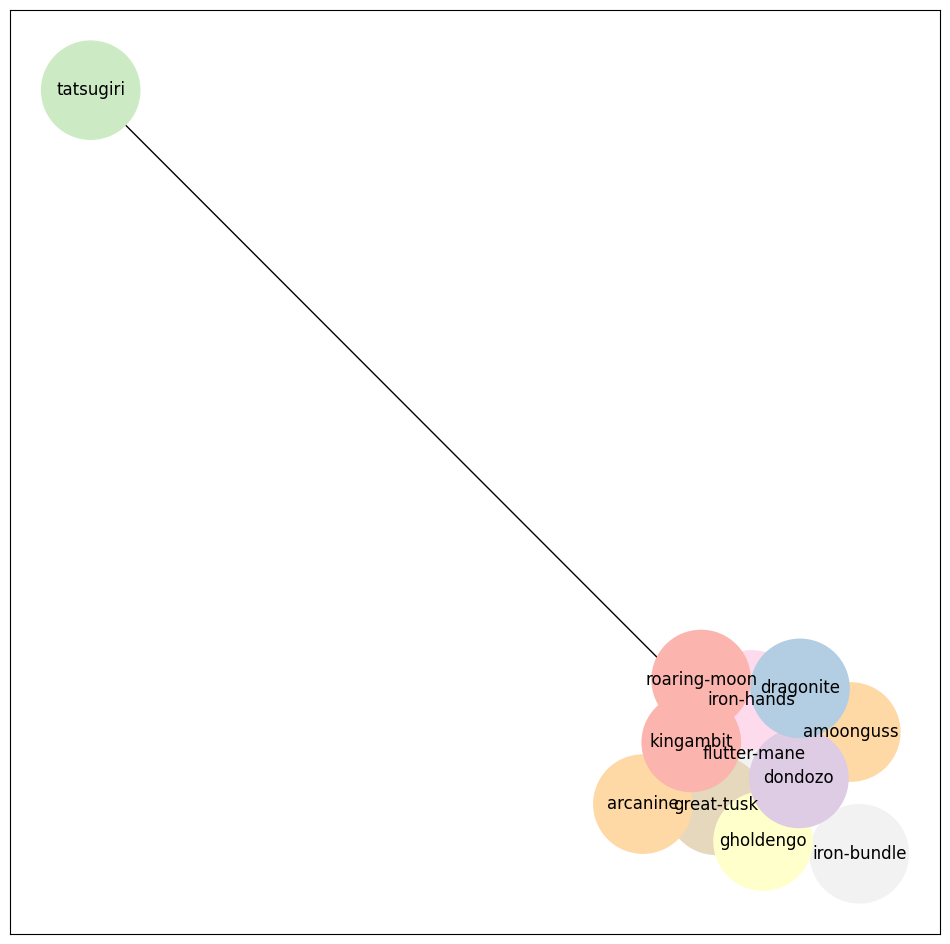

In [104]:
graph_plot_by_attacker('flutter-mane', df_basic, save_path='')

In [99]:
# %matplotlib inline
def graph_plot_by_threshold(threshold, attacker_subset, df, save_path=''):
    df = df.copy()
    scaler = MinMaxScaler()
    df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))
    df["objective_val_lb"] = df.apply(lambda row: ((row["b1"] + row["b2"] + row["b3"] - 32)), axis = 1)

    G = nx.Graph()
#     df = df[df['attacker'].isin(attacker_subset)]
    for i,r in df.iterrows():
        if r['objective_val'] < r['objective_val_lb']:
            G.add_edge(r['attacker'],r['defender'],weight=r['scaled_objective_val']*10)
        else:
            print(f'no edge: {r["attacker"]} to {r["defender"]}')

    plt.figure(3,figsize=(12,12)) 

#     pos = nx.circular_layout(G,  scale=.1)
    pos = nx.spring_layout(G,  scale=.1)
    nx.draw_networkx(G, pos, node_size=5000, cmap=plt.get_cmap('Pastel1_r'), node_color=range(len(G.nodes)))

    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
    
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'graph_plot_threshold_{int(threshold)}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

In [100]:
df_basic['objective_val']

0      360.0
1      355.0
2      445.0
3      414.0
4      388.0
       ...  
139    445.0
140    340.0
141    401.0
142    392.0
143    420.0
Name: objective_val, Length: 144, dtype: float64

In [101]:
attacker_subset = ['gholdengo', 'arcanine', 'dondozo', 'amoonguss', 'kingambit']
threshold = (.99) * df_basic['objective_val'].max()
print('threshold: ', threshold)

threshold:  440.55


no edge: iron-hands to flutter-mane
fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/graph_plot_threshold_440.png


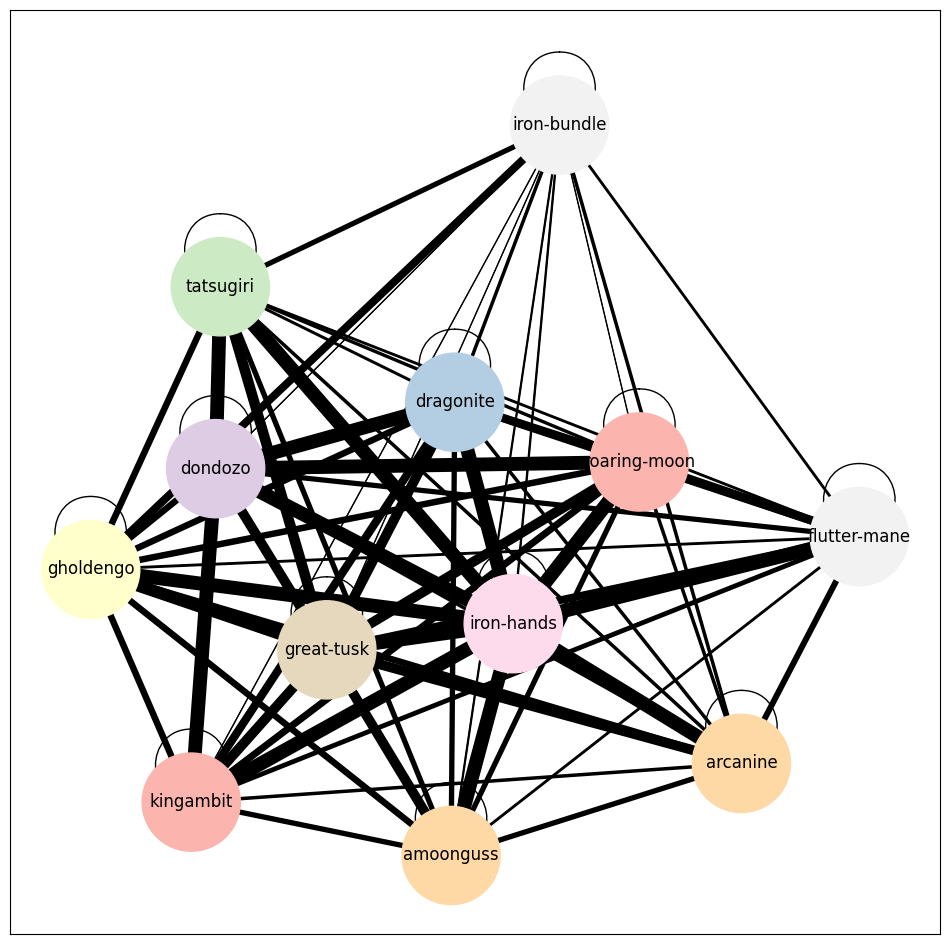

In [102]:
graph_plot_by_threshold(threshold, attacker_subset, df_basic, save_path='')

Todo: directed graph